## Question 3
(30 pts) Carry out an exploratory data analysis on the provided Used Car Dataset. Identify how
to optimally build a Linear Regression model to predict used car pricing. Tune the model and
explain your process and the results. Try using various forms of regularization and other nonlinear functions too for the model besides data pre-processing and featureset optimization to
get optimal results.

In [720]:
import pandas as pd
import numpy as np
df = pd.read_csv('userCarsDataset.csv',encoding='cp1252')
df.head()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,5,6,8,10,11,13,14,15,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-16 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,24-03-16 0:00,0.0,70435.0,07-04-16 3:16
1,24-03-16 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,24-03-16 0:00,0.0,66954.0,07-04-16 1:46
2,14-03-16 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,14-03-16 0:00,0.0,90480.0,05-04-16 12:47
3,17-03-16 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,17-03-16 0:00,0.0,91074.0,17-03-16 17:40
4,31-03-16 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,31-03-16 0:00,0.0,60437.0,06-04-16 10:17


## 1. Investing the Dataset

#### checking for null values

In [721]:
df.isnull().sum()

dateCrawled            103701
name                   103701
seller                 103702
offerType              103702
price                  103702
abtest                 103702
vehicleType            131029
yearOfRegistration     103703
gearbox                118231
powerPS                103702
model                  118576
kilometer              103702
monthOfRegistration    103703
fuelType               127799
brand                  103703
notRepairedDamage      155716
dateCreated            103703
nrOfPictures           103703
postalCode             103703
lastSeen               103703
dtype: int64

In [722]:
df.shape

(371539, 20)

In [723]:
df1 = df.copy()

#### checking for duplicates

In [724]:
df2 = df1.drop_duplicates()
df2.shape

(267802, 20)

#### checking for null values after removing duplicate records

In [725]:
df2.isnull().sum()

dateCrawled                1
name                       1
seller                     2
offerType                  2
price                      2
abtest                     2
vehicleType            27328
yearOfRegistration         3
gearbox                14531
powerPS                    2
model                  14875
kilometer                  2
monthOfRegistration        3
fuelType               24097
brand                      3
notRepairedDamage      52011
dateCreated                3
nrOfPictures               3
postalCode                 3
lastSeen                   3
dtype: int64

In [726]:
df2.dtypes

dateCrawled             object
name                    object
seller                  object
offerType               object
price                  float64
abtest                  object
vehicleType             object
yearOfRegistration     float64
gearbox                 object
powerPS                float64
model                   object
kilometer               object
monthOfRegistration    float64
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures           float64
postalCode             float64
lastSeen                object
dtype: object

#### checking value counts of categorical columns

##### a. offerType

In [727]:
df2.offerType.value_counts()

Angebot    267792
Gesuch          7
150000          1
Name: offerType, dtype: int64

##### Inference
* We can see this column is highly biased, so we would delete rows of offertype Gesuch and 150000 and then delete this column.
* Note that having 150000 in offer type is a bit strange. Let's see that particular record

In [728]:
df2[df2['offerType'] == '150000']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
142236,ell,90,golf,150000,4.0,benzin,volkswagen,NaN,25-03-16 0:00,0.0,48429,30-03-16 0:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [729]:
df2 = df2.loc[((df2['offerType'] != 'Gesuch') & (df2['offerType'] != '150000')),:]
df2.offerType.value_counts()

Angebot    267792
Name: offerType, dtype: int64

##### b. seller

In [730]:
df2.seller.value_counts()

privat        267789
gewerblich         3
Name: seller, dtype: int64

##### Inference
* We can see this column is highly biased, so we would delete rows of seller belonging to gewerblich and then delete this column

In [731]:
df2 = df2[(df2.seller != 'gewerblich')]
df2.seller.value_counts()

privat    267789
Name: seller, dtype: int64

##### c. abtest

In [732]:
df2.abtest.value_counts()

test       138959
control    128830
Name: abtest, dtype: int64

##### Inference
* This column has 2 levels each of which looks to have equal number of records. no cleaning required.

In [733]:
#df2['abtest'] = df2['abtest'].astype(str)
#df2 = df2[(df2['abtest'] != 'benzin')]
#df2.abtest.value_counts()

##### d. vehicleType

In [734]:
df2.vehicleType.value_counts()

limousine     69107
kleinwagen    57745
kombi         48547
bus           21738
cabrio        16661
coupe         13682
suv           10558
andere         2429
Name: vehicleType, dtype: int64

In [735]:
#df2['vehicleType'] = df2['vehicleType'].astype(str)
#df2 = df2[(df2['vehicleType'] != 'volkswagen')]
#df2.vehicleType.value_counts()

##### e. gearbox

In [736]:
df2['gearbox'].value_counts()

manuell      197682
automatik     55582
Name: gearbox, dtype: int64

##### f. model

In [737]:
df2['model'].value_counts()

golf                  21617
andere                19080
3er                   14848
polo                   9485
corsa                  9021
astra                  7775
passat                 7472
a4                     7376
c_klasse               6359
5er                    6136
e_klasse               5460
a3                     4764
a6                     4327
focus                  4225
fiesta                 4180
transporter            3950
twingo                 3567
2_reihe                3512
a_klasse               3121
fortwo                 3098
vectra                 3068
1er                    2822
mondeo                 2576
clio                   2575
3_reihe                2541
touran                 2539
punto                  2393
zafira                 2166
megane                 2089
ka                     1950
                      ...  
lanos                    60
mii                      60
range_rover_evoque       50
nubira                   43
crossfire           

##### g. kilometer

In [738]:
df2['kilometer'].value_counts() 

150000    151904
125000     24098
150000     21365
100000     10140
90000       7948
80000       6990
70000       6246
60000       5517
50000       4865
5000        4437
40000       4071
30000       3886
20000       3653
125000      3394
100000      1403
10000       1271
90000       1067
80000        999
70000        819
60000        759
50000        639
5000         627
40000        536
30000        511
20000        471
10000        173
Name: kilometer, dtype: int64

##### h. brand

In [739]:
df2['brand'].value_counts() 

volkswagen        57361
bmw               29179
opel              28823
mercedes_benz     25482
audi              23656
ford              18394
renault           12953
peugeot            7970
fiat               6980
seat               5046
mazda              4135
skoda              4038
citroen            3763
smart              3744
nissan             3648
toyota             3362
sonstige_autos     2883
hyundai            2634
mini               2450
volvo              2412
mitsubishi         2222
honda              2009
kia                1827
suzuki             1707
alfa_romeo         1662
porsche            1621
chevrolet          1334
chrysler           1031
dacia               665
jeep                584
daihatsu            582
land_rover          552
subaru              549
jaguar              465
trabant             429
daewoo              387
saab                378
rover               360
lancia              354
lada                158
Name: brand, dtype: int64

##### i. fuelType

In [740]:
df2['fuelType'].value_counts() 

benzin     161459
diesel      77604
lpg          3782
cng           422
hybrid        195
andere        157
elektro        80
Name: fuelType, dtype: int64

##### j. notRepairedDamage

In [741]:
df2.notRepairedDamage.value_counts()

nein    189708
ja       26078
Name: notRepairedDamage, dtype: int64

##### k. nrOfPictures

In [742]:
df2.nrOfPictures.value_counts()

0.0    267789
Name: nrOfPictures, dtype: int64

In [743]:
df2.shape

(267791, 20)

#### Dropping Rows with NAs for categorical columns and Columns of less importance

In [744]:
df3 = df2.copy()

In [745]:
df3.isnull().sum()

dateCrawled                1
name                       1
seller                     2
offerType                  2
price                      2
abtest                     2
vehicleType            27324
yearOfRegistration         2
gearbox                14527
powerPS                    2
model                  14874
kilometer                  2
monthOfRegistration        2
fuelType               24092
brand                      2
notRepairedDamage      52005
dateCreated                2
nrOfPictures               2
postalCode                 2
lastSeen                   2
dtype: int64

##### Deleting rows with NaN - which have less number of NaN

In [746]:
df3 = df3.dropna(subset=['seller','abtest','offerType','price','yearOfRegistration'],axis=0)
df3.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            27322
yearOfRegistration         0
gearbox                14525
powerPS                    0
model                  14872
kilometer                  0
monthOfRegistration        0
fuelType               24090
brand                      0
notRepairedDamage      52003
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [747]:
df3.shape

(267789, 20)

##### Dropping columns 
* Deleting columns which have only 1 level and Date columns 
* Deleting name, model, postal code as these will end up generating too many columns during OHE

In [748]:
df4 = df3.drop(['seller','offerType','lastSeen','postalCode','dateCrawled','nrOfPictures','dateCreated','name','model'],axis=1)
df4.columns

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

##### Imputing NA's of categorical Column with Not-Known Category

In [749]:
df4.shape

(267789, 11)

In [750]:
df4['notRepairedDamage'].fillna(value='Not-Known',inplace=True)
df4['vehicleType'].fillna(value='Not-Known',inplace=True)
df4['gearbox'].fillna(value='Not-Known',inplace=True)
df4['fuelType'].fillna(value='Not-Known',inplace=True)

In [751]:
df4.isnull().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

#### Numerical Columns

In [752]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### 1. Price

Text(0.5, 0, 'Box Plot of Price')

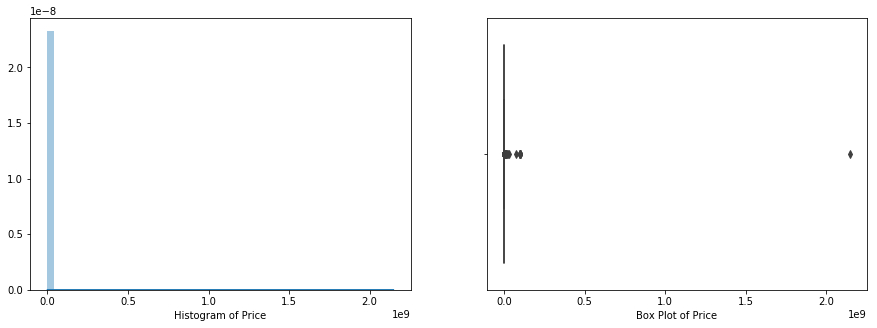

In [753]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1,ax2 = axes.flatten()
g = sns.distplot(df4['price'],ax=ax1)
g.set_xlabel('Histogram of Price')
g2 = sns.boxplot(df4['price'],ax=ax2)
g2.set_xlabel('Box Plot of Price')

In [754]:
df4['price'].describe()

count    2.677890e+05
mean     1.929762e+04
std      4.203252e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

##### Inference
* There are rows with price 0. These row are suspicious since price cannot be zero. We will delete such rows.
* We can see that there is a large gap in the 75th percentile and the max price. We will delete such extreme rows since they will impact our coefficients. 
* As visible in the box plot we can see that there is only 1 extreme value of 2.147484e+09 . We will delete this row

In [755]:
max_price = df4['price'].max()
df4 = df4.loc[~(df4['price'] ==max_price),:]
df4.shape

(267788, 11)

In [756]:
# A car cannot have a 0 price. Hence we will delete such rows.
df4[df4['price'] == 0].count()

price                  7821
abtest                 7821
vehicleType            7821
yearOfRegistration     7821
gearbox                7821
powerPS                7821
kilometer              7821
monthOfRegistration    7821
fuelType               7821
brand                  7821
notRepairedDamage      7821
dtype: int64

#### Deleting rows with 0 price

In [757]:
df4 = df4[df4['price'] != 0]
df4.shape

(259967, 11)

In [758]:
df4.loc[df4.price < 100].count()

price                  1822
abtest                 1822
vehicleType            1822
yearOfRegistration     1822
gearbox                1822
powerPS                1822
kilometer              1822
monthOfRegistration    1822
fuelType               1822
brand                  1822
notRepairedDamage      1822
dtype: int64

##### Outlier Removal in  Price column

In [759]:
Q1 = df4['price'].quantile(0.25)
Q3 = df4['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

6249.0


In [760]:
((df4['price'] < (Q1 - 1.5 * IQR)) | (df4['price'] > (Q3 + 1.5 * IQR))).sum()

19094

In [761]:
df4.shape

(259967, 11)

In [762]:
df5 = df4.loc[~((df4['price'] < (Q1 - 1.5 * IQR)) | (df4['price'] > (Q3 + 1.5 * IQR))),:]
df5.shape

(240873, 11)

Text(0.5, 0, 'Box Plot of Price')

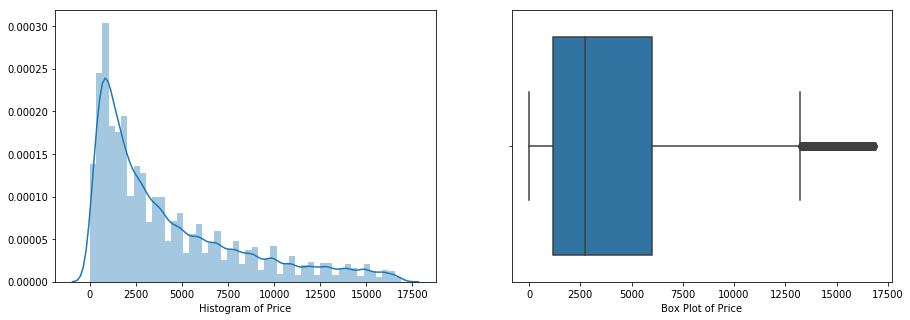

In [763]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1,ax2 = axes.flatten()
g = sns.distplot(df5['price'],ax=ax1)
g.set_xlabel('Histogram of Price')
g2 = sns.boxplot(df5['price'],ax=ax2)
g2.set_xlabel('Box Plot of Price')

##### Inference
* We can see how removing outliers resulted in a better distribution of the Price

##### 2. yearOfRegistration

In [764]:
df5['yearOfRegistration'].value_counts()

2000.0    16638
1999.0    15642
2005.0    15465
2001.0    14091
2003.0    14004
2006.0    13980
2004.0    13778
2002.0    13389
1998.0    12312
2007.0    11874
2008.0    10465
1997.0    10093
2009.0     9725
1996.0     7508
2017.0     7017
2010.0     6972
1995.0     6530
2016.0     6440
2011.0     6120
2012.0     4214
1994.0     3365
2018.0     2687
2013.0     2305
1993.0     2297
1992.0     2008
1991.0     1901
1990.0     1799
2014.0     1331
1989.0      873
2015.0      682
          ...  
1001.0        1
1930.0        1
1111.0        1
1255.0        1
1300.0        1
1925.0        1
1400.0        1
1923.0        1
3700.0        1
1944.0        1
6500.0        1
4100.0        1
4800.0        1
3200.0        1
5300.0        1
5555.0        1
5600.0        1
5900.0        1
5911.0        1
8500.0        1
3800.0        1
8888.0        1
2222.0        1
9450.0        1
2200.0        1
2900.0        1
2066.0        1
2500.0        1
1949.0        1
2290.0        1
Name: yearOfRegistration

##### Inference
* We can see there are some strange values for year ie 2500 , 5555 , 6200 etc. We would remove these rows rather than imputing them with some random number
* Assuming someone would really sell the first motorized car ever build (1863), we will delete rows below 

In [765]:
df5 = df5[(df5['yearOfRegistration'] > 1863) & (df5['yearOfRegistration'] < 2020)]
df5['yearOfRegistration'].value_counts()

2000.0    16638
1999.0    15642
2005.0    15465
2001.0    14091
2003.0    14004
2006.0    13980
2004.0    13778
2002.0    13389
1998.0    12312
2007.0    11874
2008.0    10465
1997.0    10093
2009.0     9725
1996.0     7508
2017.0     7017
2010.0     6972
1995.0     6530
2016.0     6440
2011.0     6120
2012.0     4214
1994.0     3365
2018.0     2687
2013.0     2305
1993.0     2297
1992.0     2008
1991.0     1901
1990.0     1799
2014.0     1331
1989.0      873
2015.0      682
          ...  
1961.0       26
1959.0       19
1956.0       18
2019.0       13
1958.0       11
1957.0       10
1950.0        9
1953.0        8
1955.0        8
1951.0        7
1937.0        7
1954.0        6
1952.0        6
1929.0        6
1945.0        3
1934.0        3
1938.0        3
1935.0        2
1928.0        2
1932.0        2
1940.0        2
1941.0        2
1942.0        2
1943.0        2
1936.0        1
1930.0        1
1949.0        1
1925.0        1
1923.0        1
1944.0        1
Name: yearOfRegistration

In [766]:
df5.shape

(240773, 11)

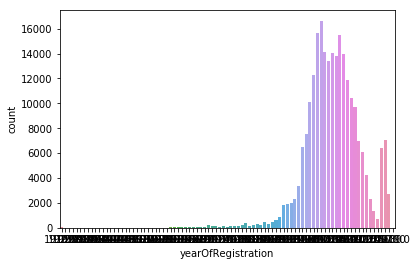

In [767]:
sns.countplot(df5['yearOfRegistration'])

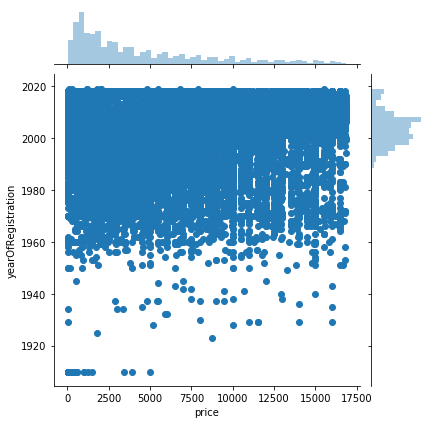

In [768]:
sns.jointplot(df5['price'],df5['yearOfRegistration'])

##### Inference
* Most of the cars belong to year of Registration between 1999-2009

##### 3. powerPS

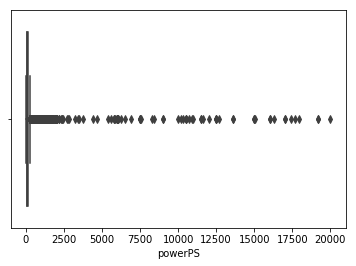

In [769]:
sns.boxplot(df5['powerPS'])

In [770]:
df5['powerPS'].describe()

count    240773.000000
mean        108.965582
std         192.737637
min           0.000000
25%          69.000000
50%         102.000000
75%         140.000000
max       20000.000000
Name: powerPS, dtype: float64

In [771]:
# Checking for number of rows which have 0 powerPS
df5[df5['powerPS'] == 0].count()

price                  25904
abtest                 25904
vehicleType            25904
yearOfRegistration     25904
gearbox                25904
powerPS                25904
kilometer              25904
monthOfRegistration    25904
fuelType               25904
brand                  25904
notRepairedDamage      25904
dtype: int64

In [772]:
df5.loc[df5['powerPS'] > 1000,'powerPS'].count()

193

##### Deleting rows containing powerPS less than 0

In [773]:
df5 = df5[(df5['powerPS'] >0)]
df5.shape

(214869, 11)

In [774]:
df5.loc[df5['powerPS'] > 1000,:] = 1000

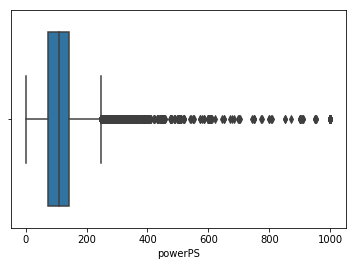

In [775]:
sns.boxplot(df5['powerPS'])

Text(0.5, 1.0, 'powerPS after capping Outliers')

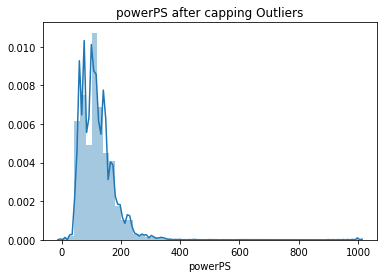

In [776]:
g = sns.distplot(df5['powerPS'])
g.set_title('powerPS after capping Outliers')

##### 4. monthOfRegistration

In [777]:
# Checking for number of rows which have 0 powerPS
df5[df5['monthOfRegistration'] == 0].count()

price                  14337
abtest                 14337
vehicleType            14337
yearOfRegistration     14337
gearbox                14337
powerPS                14337
kilometer              14337
monthOfRegistration    14337
fuelType               14337
brand                  14337
notRepairedDamage      14337
dtype: int64

##### We will delete this column as it has too many 0s and we are not sure how to impute this column

In [778]:
df5.drop('monthOfRegistration',axis=1,inplace=True)
df5.shape

(214869, 10)

In [779]:
df5.describe()

,price,yearOfRegistration,powerPS
count,214869.000000,214869.000000,214869.000000
mean,4408.126291,2002.236330,119.068735
std,4001.844771,30.823994,59.360125
min,1.000000,1000.000000,1.000000
25%,1299.000000,1999.000000,75.000000
50%,2999.000000,2003.000000,109.000000
75%,6500.000000,2007.000000,144.000000
max,16870.000000,2019.000000,1000.000000


##### Inference
* These values look quite okay now.

In [780]:
df5.dtypes

price                 float64
abtest                 object
vehicleType            object
yearOfRegistration    float64
gearbox                object
powerPS               float64
kilometer              object
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

In [781]:
#Changing kilometer to float
df5['kilometer'] = df5['kilometer'].astype('float')
df5.dtypes

price                 float64
abtest                 object
vehicleType            object
yearOfRegistration    float64
gearbox                object
powerPS               float64
kilometer             float64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

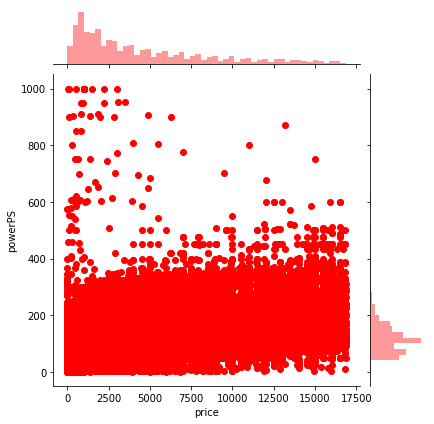

In [782]:
sns.jointplot(df5['price'],df5['powerPS'],color='red',kind='scatter')

##### Inference 
* We can see that even for powerPS > 600 the price is shown to be low which is strange. The highest price cars have powerPS below 600
* Lets cap powerPS of above 600 to 600

In [783]:
df5.loc[df5['powerPS'] > 600,'powerPS'] = 600
df5.loc[df5['powerPS'] > 600,'powerPS'].count()

0

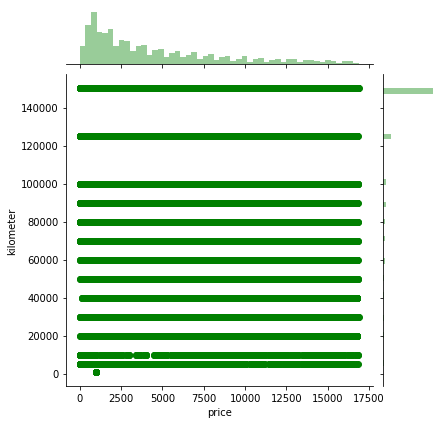

In [784]:
sns.jointplot(df5['price'],df5['kilometer'],color='green')

##### Inference 
* We can see not much can be concluded from this graph as price has less relation with kilometers here

In [785]:
df5.columns

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

## Model Building

### 1. Checking correlation

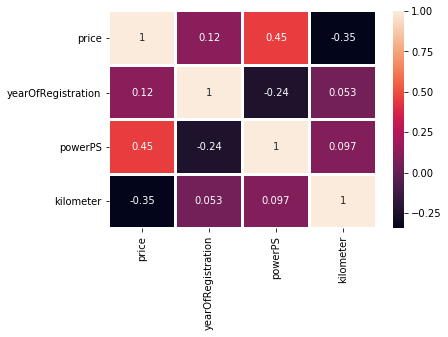

In [786]:
sns.heatmap(df5.corr(),annot=True,linecolor='white',linewidths=2)

### 2. Dummy Variable For categorical columns

In [799]:
X = df5.loc[:,~df5.columns.isin(['price'])]
y = df5['price']
X_dummy = pd.get_dummies(X,drop_first=True,prefix_sep='_')
print(X_dummy.columns)

Index(['yearOfRegistration', 'powerPS', 'kilometer', 'abtest_control',
       'abtest_test', 'vehicleType_Not-Known', 'vehicleType_andere',
       'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe',
       'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine',
       'vehicleType_suv', 'gearbox_Not-Known', 'gearbox_automatik',
       'gearbox_manuell', 'fuelType_Not-Known', 'fuelType_andere',
       'fuelType_benzin', 'fuelType_cng', 'fuelType_diesel',
       'fuelType_elektro', 'fuelType_hybrid', 'fuelType_lpg',
       'brand_alfa_romeo', 'brand_audi', 'brand_bmw', 'brand_chevrolet',
       'brand_chrysler', 'brand_citroen', 'brand_dacia', 'brand_daewoo',
       'brand_daihatsu', 'brand_fiat', 'brand_ford', 'brand_honda',
       'brand_hyundai', 'brand_jaguar', 'brand_jeep', 'brand_kia',
       'brand_lada', 'brand_lancia', 'brand_land_rover', 'brand_mazda',
       'brand_mercedes_benz', 'brand_mini', 'brand_mitsubishi', 'brand_nissan',
       'brand_opel', 

In [631]:
df_new = pd.get_dummies(df5,drop_first=True,prefix_sep='_')

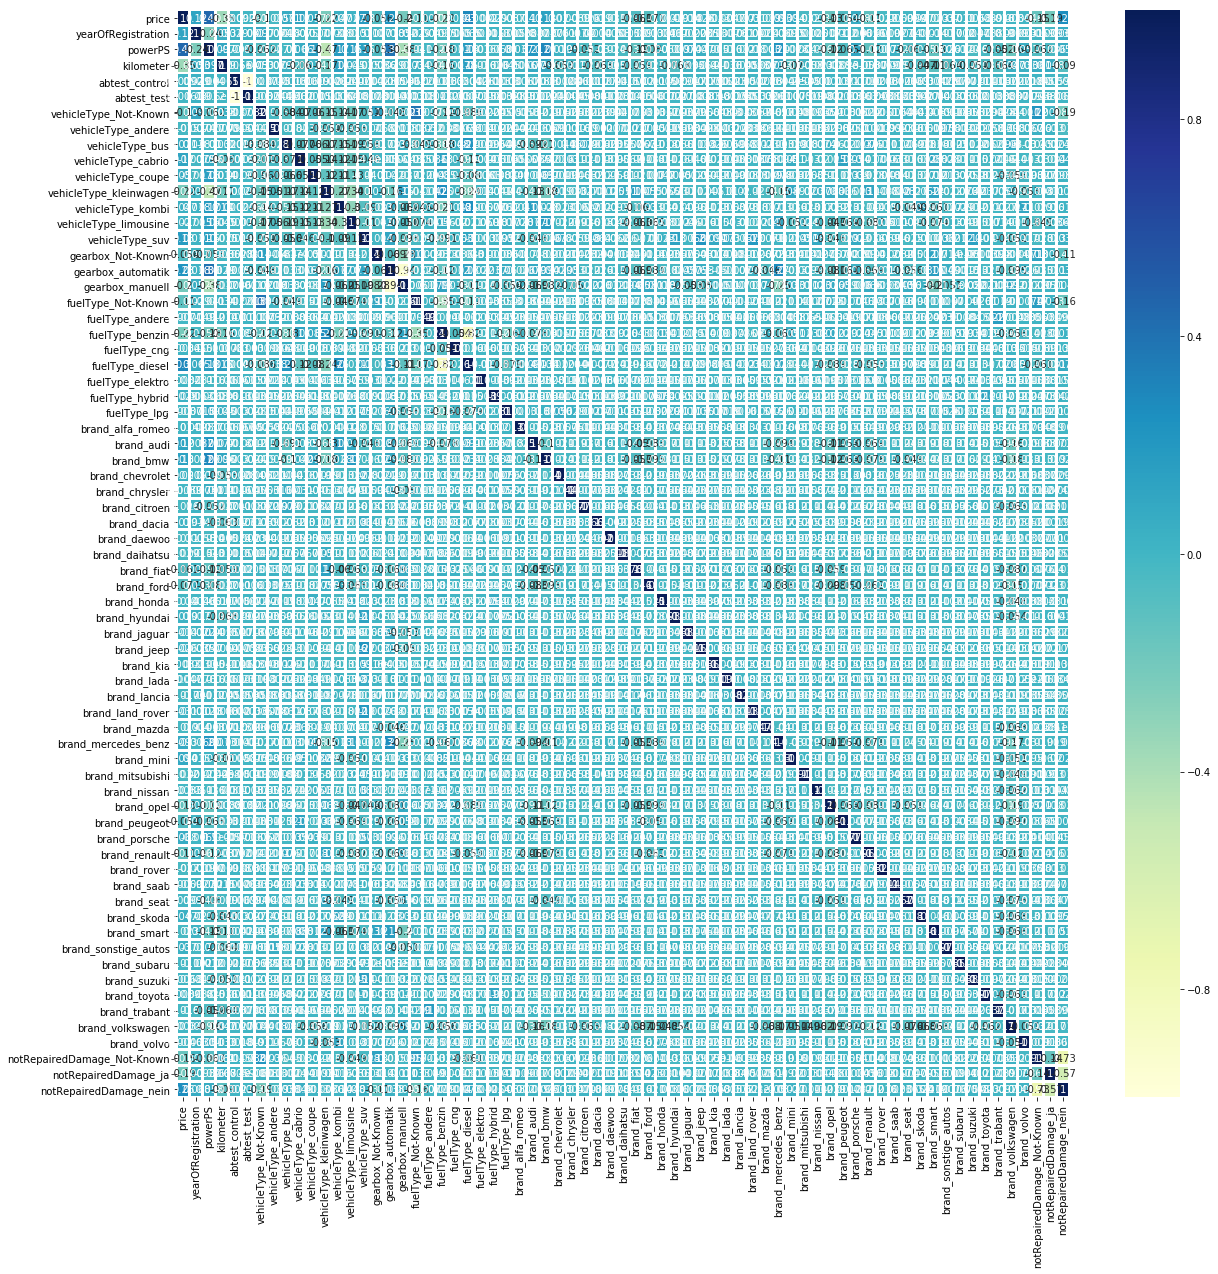

In [632]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True,linecolor='white',linewidths=2, ax=ax,cmap='YlGnBu')
plt.show()

In [800]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=0)

### 3. Scaling Variables

In [801]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

### 4.Fitting a Linear Regression Model

In [802]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_train = linear_model.predict(X_train_scaled)
rmse_t = np.sqrt(mean_squared_error(y_train,y_pred_train))
r2_t = r2_score(y_train,y_pred_train)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_linear))
r2 = r2_score(y_test,y_pred_linear)
print('Root mean squared error on Training Set', rmse_t)
print('R2 score on Train Set: ', r2_t)
print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Training Set 2464.65670046831
R2 score on Train Set:  0.6190574197676098
Root mean squared error on Testing Set 2481.3298348429403
R2 score on Testing Set:  0.6193421983998604


Text(0.5, 1.0, 'Actual Vs Predicted')

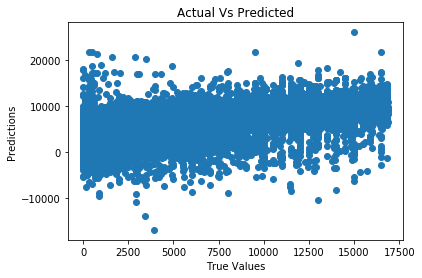

In [636]:
plt.scatter(y_test, y_pred_linear)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Actual Vs Predicted')

In [637]:
print("Score",linear_model.score(X_test_scaled, y_test)) 

Score 0.6193421983998604


### Non Linear Model - Using Polynomial Features

In [441]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_dummy)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred_poly = linear_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_poly))
r2 = r2_score(y_test,y_pred_poly)
print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)


Root mean squared error on Testing Set 2486.168667860055
R2 score on Testing Set:  0.6136350324234405


### 5. Ridge Model

In [791]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(random_state=0) #Keeping any alpha and tol is not improving the performance so removed it
ridge_reg.fit(X_train_scaled,y_train)
y_pred_ridge = linear_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
r2 = r2_score(y_test,y_pred_ridge)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Testing Set 2481.3298348429403
R2 score on Testing Set:  0.6193421983998604


### 6. Lasso Model

In [792]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1.0,random_state=0)
lasso_reg.fit(X_train_scaled,y_train)
y_pred_lasso = linear_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
r2 = r2_score(y_test,y_pred_lasso)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Testing Set 2481.3298348429403
R2 score on Testing Set:  0.6193421983998604


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### 7. OLS Model

In [793]:
import statsmodels.api as sm
import statsmodels.formula.api as sm 
from statsmodels.formula.api import ols
from IPython.display import HTML, display

X1= X_dummy.copy()
X['intercept'] = np.ones((X.shape[0],),dtype=int) #Adding an intercept column of value 1 - constant (Beta -0)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=0)

ols_model = sm.OLS(y_train1,X_train1).fit()
ols_model_summary = ols_model.summary()
HTML(ols_model_summary.as_html())